In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

### Stage 2

- Eksplorasi berbagai attributes
- Target output olahan data
- Mengecek apakah ada data bermasalah 
- Handling missing value 
- Handling duplicated data 
- Handling outlier data 
- Handling imbalanced data 
- Handling data redundan
- Handling data bermasalah lainnya 
- Penjelasan proses handling untuk setiap data yang bermasalah

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
nums=['Age', 'Region_Code','Annual_Premium','Vintage']
cats=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
category = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

df[category].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Target Output (Response)

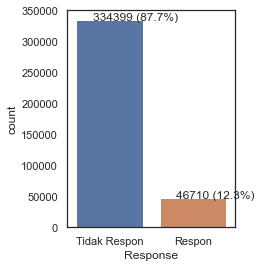

In [6]:
# RESPONSE

sns.set(style='white',font_scale=1.0)
fig = plt.figure(figsize=[3,4])
ax = sns.countplot(data=df,x='Response')
ax.set_xticklabels(['Tidak Respon','Respon'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.2, p.get_height()+400))

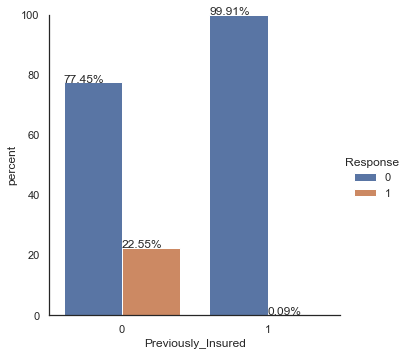

In [7]:
# RESPONSE & Previously Insured

x,y = 'Previously_Insured', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

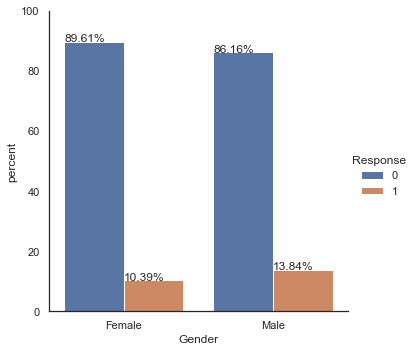

In [8]:
# GENDER & RESPONSE

x,y = 'Gender', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

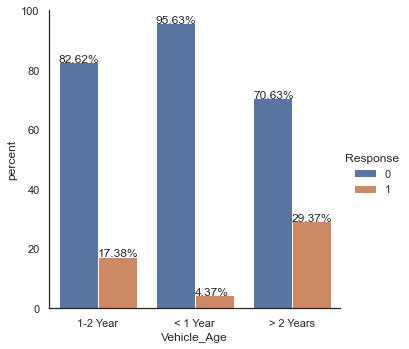

In [9]:
# RESPONSE & VA 

x,y = 'Vehicle_Age', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

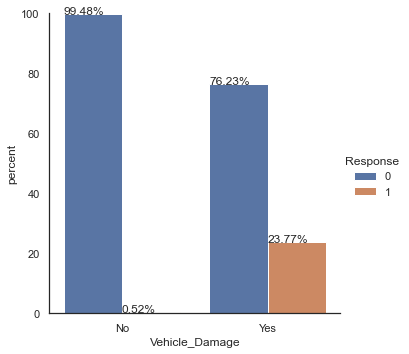

In [10]:
# RESPONSE & VD

x,y = 'Vehicle_Damage', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

## Missing Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [12]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Duplicated Data

In [13]:
df.duplicated().sum()

0

In [14]:
df.duplicated(subset=['id','Vehicle_Age', 'Vehicle_Damage']).sum()

0

In [15]:
#drop id

df.duplicated(subset=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']).sum()

269

In [16]:
#Parameter keep

df = df.drop_duplicates(keep='first')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [17]:
#drop id

df.duplicated(subset=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']).sum()

269

## Handling Outliers

<AxesSubplot:ylabel='Annual_Premium'>

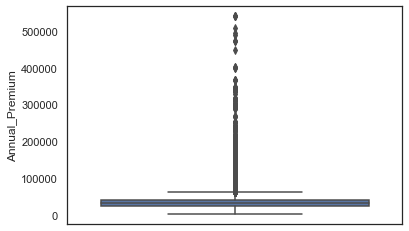

In [18]:
#OUTLIER

sns.boxplot(y = 'Annual_Premium', data = df)

In [19]:
#Berdasarkan Metode IQR 

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))

Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entities = ((df['Annual_Premium'] >= low_limit) & (df['Annual_Premium'] <= high_limit))
df = df[filtered_entities]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789


## Feature Engineering

In [20]:
df1 = df.copy()

merged_value = ['> 2 Years', '1-2 Year']
df1['Vehicle_Age'] = np.where(df1['Vehicle_Age'].isin(merged_value), '> 1 Year', '< 1 Year')

In [21]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 1 Year,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,> 1 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 1 Year,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Feature Transformation

In [22]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000
mean,190534.855484,38.670344,0.997942,26.437281,0.459666,29264.643973,112.542923,154.345442,0.121781
std,110036.802591,15.440166,0.045316,13.310391,0.498371,14743.056656,54.039616,83.670478,0.327033
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95219.000000,25.000000,1.000000,15.000000,0.000000,24102.000000,30.000000,82.000000,0.000000
50%,190529.000000,36.000000,1.000000,28.000000,0.000000,31319.000000,151.000000,154.000000,0.000000
75%,285823.000000,49.000000,1.000000,36.000000,1.000000,38596.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,61892.000000,163.000000,299.000000,1.000000


In [23]:
#standarisasi = age, vintage
#normalisasi = annual premium

from sklearn.preprocessing import MinMaxScaler, StandardScaler

df1['Annual_Premium_norm'] = MinMaxScaler().fit_transform(df['Annual_Premium'].values.reshape(len(df), 1))
df1['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df1['Vintage_std'] = StandardScaler().fit_transform(df['Vintage'].values.reshape(len(df), 1))

In [24]:
df1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_norm,Age_std,Vintage_std
count,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,3.707890e+05,3.707890e+05
mean,190534.855484,38.670344,0.997942,26.437281,0.459666,29264.643973,112.542923,154.345442,0.121781,0.449439,-6.911200e-16,-4.806618e-17
std,110036.802591,15.440166,0.045316,13.310391,0.498371,14743.056656,54.039616,83.670478,0.327033,0.248778,1.000001e+00,1.000001e+00
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,-1.209208e+00,-1.725168e+00
25%,95219.000000,25.000000,1.000000,15.000000,0.000000,24102.000000,30.000000,82.000000,0.000000,0.362323,-8.853766e-01,-8.646483e-01
50%,190529.000000,36.000000,1.000000,28.000000,0.000000,31319.000000,151.000000,154.000000,0.000000,0.484104,-1.729481e-01,-4.128603e-03
75%,285823.000000,49.000000,1.000000,36.000000,1.000000,38596.000000,152.000000,227.000000,0.000000,0.606898,6.690129e-01,8.683428e-01
max,381109.000000,85.000000,1.000000,52.000000,1.000000,61892.000000,163.000000,299.000000,1.000000,1.000000,3.000597e+00,1.728863e+00


## Feature Encoding

In [25]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [26]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_norm,Age_std,Vintage_std
0,1,Male,44,1,28.0,0,> 1 Year,Yes,40454.0,26.0,217,1,0.638250,0.345182,0.748826
1,2,Male,76,1,3.0,0,> 1 Year,No,33536.0,26.0,183,0,0.521515,2.417701,0.342470
2,3,Male,47,1,28.0,0,> 1 Year,Yes,38294.0,26.0,27,1,0.601802,0.539480,-1.521990
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.438544,-1.144442,0.581503
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.419594,-0.626312,-1.378570


In [27]:
# LABEL ENCODING

#gender
mapping_gender = {
    'Male': 1,
    'Female': 0
}
df1['Gender_Male'] = df1['Gender'].map(mapping_gender)



#Vehicle age 
mapping_VA = {
    '> 1 Year': 1,
    '< 1 Year': 0
}
df1['Vehicle_Age_> 1 Year'] = df1['Vehicle_Age'].map(mapping_VA)



#Vehicle damage
mapping_VD = {
    'Yes': 1,
    'No': 0
}
df1['Vehicle_Damage_Yes'] = df1['Vehicle_Damage'].map(mapping_VD)


In [28]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_norm,Age_std,Vintage_std,Gender_Male,Vehicle_Age_> 1 Year,Vehicle_Damage_Yes
0,1,Male,44,1,28.0,0,> 1 Year,Yes,40454.0,26.0,217,1,0.638250,0.345182,0.748826,1,1,1
1,2,Male,76,1,3.0,0,> 1 Year,No,33536.0,26.0,183,0,0.521515,2.417701,0.342470,1,1,0
2,3,Male,47,1,28.0,0,> 1 Year,Yes,38294.0,26.0,27,1,0.601802,0.539480,-1.521990,1,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.438544,-1.144442,0.581503,1,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.419594,-0.626312,-1.378570,0,0,0


### Drop Kolom Outdated

In [29]:
# Membuang kolom yang tidak digunakan

df1 = df1.drop(columns=['id','Vehicle_Age', 'Vehicle_Damage','Gender','Age', 'Annual_Premium', 'Vintage'])

In [30]:
df1.head()

,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Response,Annual_Premium_norm,Age_std,Vintage_std,Gender_Male,Vehicle_Age_> 1 Year,Vehicle_Damage_Yes
0,1,28.0,0,26.0,1,0.638250,0.345182,0.748826,1,1,1
1,1,3.0,0,26.0,0,0.521515,2.417701,0.342470,1,1,0
2,1,28.0,0,26.0,1,0.601802,0.539480,-1.521990,1,1,1
3,1,11.0,1,152.0,0,0.438544,-1.144442,0.581503,1,0,0
4,1,41.0,1,152.0,0,0.419594,-0.626312,-1.378570,0,0,0


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Driving_License       370789 non-null  int64  
 1   Region_Code           370789 non-null  float64
 2   Previously_Insured    370789 non-null  int64  
 3   Policy_Sales_Channel  370789 non-null  float64
 4   Response              370789 non-null  int64  
 5   Annual_Premium_norm   370789 non-null  float64
 6   Age_std               370789 non-null  float64
 7   Vintage_std           370789 non-null  float64
 8   Gender_Male           370789 non-null  int64  
 9   Vehicle_Age_> 1 Year  370789 non-null  int64  
 10  Vehicle_Damage_Yes    370789 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 33.9 MB


## Class Imbalance

<AxesSubplot:xlabel='Response', ylabel='count'>

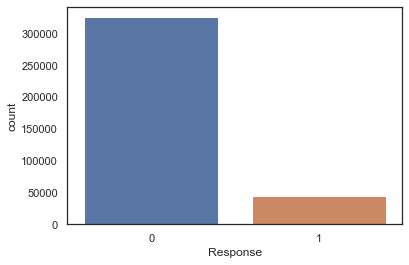

In [32]:
# Sebelum handling class imbalance
sns.countplot(x = 'Response', data = df1)

In [33]:
from imblearn import under_sampling, over_sampling

# Pemisahan fitur dan target
X = df1.drop(['Response'],axis=1)
x_columns = list(X.columns)
y = df1['Response']

# Under sampling
X_under, y_under = under_sampling.RandomUnderSampler(random_state=42).fit_resample(X, y)

# Mengubah numpy array ke Dataframe agar bisa diconcat
X_under = pd.DataFrame(X_under)
y_under = pd.DataFrame(y_under)

# Rename
X_under.columns = x_columns
y_under = y_under.rename(columns = {0: 'Response'})

# Concat dan buat dataframe baru
df_under = pd.concat([X_under,y_under], axis = 1)

# Drop id
df_under = df_under.drop('id',axis =1)

df_under.head()

KeyError: "['id'] not found in axis"

In [ ]:
# Setelah class imbalance
sns.countplot(x = 'Response', data = df_under)

In [ ]:
print(df_under['Response'].value_counts())
print(df_under.shape)

### Penentuan Fitur

In [ ]:
df_final = df_under

features = list(df_final.columns)
corr_= df_final[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Pada tahap awal, digunakan seluruh fitur dan membagi fitur-fitur berdasarkan tipe numerik dan kategori. Setelah melakukan Data Cleaning, selanjutnya fitur-fitur tersebut dilakukan fitur engineering, fitur transformation, dan fitur encoding. Setelah semua proses dilakukan, kami menemukan hanya beberapa fitur saja yang memiliki korelasi cukup tinggi. Berikut fitur yang akan digunakan dan di drop: 


a. Fitur yang di pakai:
   - Vehicle Damage (Yes)
   - Previously Insured
   - Vehicle Age (> 1 Year)
   - Age (standarisasi)


b. Fitur yang di drop:
   - id
   - Age > melakukan fitur transformasi menggunakan standarisasi
   - Vintage > melakukan fitur transformasi menggunakan standarisasi
   - Annual Premium > melakukan fitur transformasi menggunakan normalisasi

# Stage 3

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Driving_License       370789 non-null  int64  
 1   Region_Code           370789 non-null  float64
 2   Previously_Insured    370789 non-null  int64  
 3   Policy_Sales_Channel  370789 non-null  float64
 4   Response              370789 non-null  int64  
 5   Annual_Premium_norm   370789 non-null  float64
 6   Age_std               370789 non-null  float64
 7   Vintage_std           370789 non-null  float64
 8   Gender_Male           370789 non-null  int64  
 9   Vehicle_Age_> 1 Year  370789 non-null  int64  
 10  Vehicle_Damage_Yes    370789 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 42.0 MB


In [35]:
df1.head()

,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Response,Annual_Premium_norm,Age_std,Vintage_std,Gender_Male,Vehicle_Age_> 1 Year,Vehicle_Damage_Yes
0,1,28.0,0,26.0,1,0.638250,0.345182,0.748826,1,1,1
1,1,3.0,0,26.0,0,0.521515,2.417701,0.342470,1,1,0
2,1,28.0,0,26.0,1,0.601802,0.539480,-1.521990,1,1,1
3,1,11.0,1,152.0,0,0.438544,-1.144442,0.581503,1,0,0
4,1,41.0,1,152.0,0,0.419594,-0.626312,-1.378570,0,0,0


In [36]:
#Import Library Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [37]:
#Import Library Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

Split Data Train & Test

In [38]:
import pandas as pd

dataset = pd.read_csv("train.csv")
X = df1.drop(['Response'],axis=1)
y = df1[['Response']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

Pengujian Beberapa Model

In [39]:
#Modeling Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.28
Recall (Test Set): 0.30
F1-Score (Test Set): 0.29
AUC: 0.60


In [40]:
#Modeling Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.10
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.84


In [43]:
#Modeling Random Forest
model=RandomForestClassifier()
model.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,r2_score,accuracy_score
y_pred=model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",model.score(X_test,y_test)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(model.get_params())
print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     97695
           1       0.36      0.12      0.18     13542

    accuracy                           0.87    111237
   macro avg       0.63      0.55      0.55    111237
weighted avg       0.82      0.87      0.84    111237

Confusion Matrix:
 [[94885  2810]
 [11933  1609]]
Training Score:
 86.74631642349219
Mean Squared Error:
 0.13253683576507816
R2 score is:
 -0.2395954872346353
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
86.74631642349219


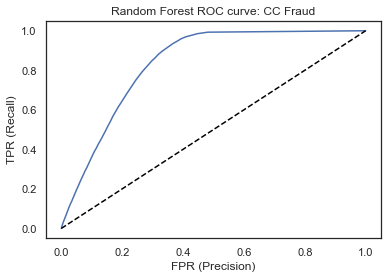

Area under curve (AUC):  0.8334189211827379


In [42]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [44]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9997996547897916
Test score:0.8674631642349219


In [ ]:
from xgboost import XGBClassifier
model1=XGBClassifier()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",model1.score(X_test,y_test)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(model1.get_params())
print('accuracy score',accuracy_score(y_test,y_pred)*100)

In [ ]:
y_score = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

In [ ]:
show_feature_importance(model1)